In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data loading and preprocessing
dataset = pd.read_csv('/kaggle/input/cars-purchase-decision-dataset/car_data.csv')
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
#extracting dependent and independent variables
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [4]:
#Splitting dataset to training and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [5]:
#Feature scaling for accurate predictions
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [6]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [7]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0])

In [8]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[138,  14],
       [ 24,  74]])

/tmp/ipykernel_31/376895058.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


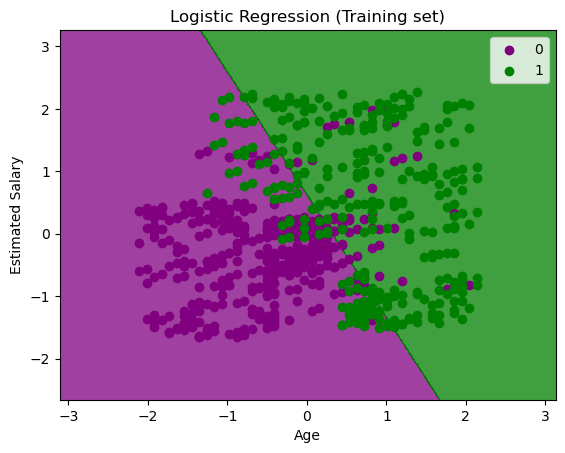

In [9]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

/tmp/ipykernel_31/2988503826.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


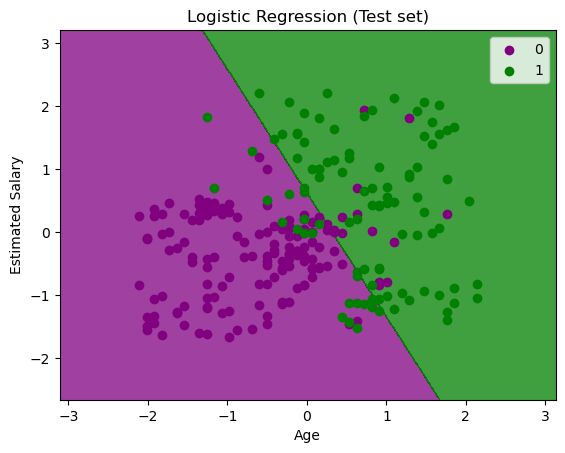

In [11]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

Thus logistic regression basically finds a best fit line and forms one straight line and classifies the data points. This will not give a fair representation of classification for several points. Thus it might ive wrong results.